In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Revisiting the 1D chain with a computer

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\braket}[1]{\left\langle{#1}\right\rangle}$

In this exercise session, we will revisit the [exercises of week 3](https://moodle.polytechnique.fr/pluginfile.php/614753/course/section/57413/exercise_03.pdf) as a basic example of how we can use numerics in quantum physics.

We briefly recall the setting. We consider a Hilbert space spanned the orthonormal basis $\left\{ \ket n \right\}_{n \in \{ 1, \ldots, N-1\}}$. We define the right translation operator $\hat T$ by $\hat T \ket n = \ket{n+1}$ with periodic boundary conditions, meaning that $\hat T \ket {N-1} = \ket N = \ket 0$. We consider the Hamiltonian:

$$ \hat H = E_0 - J \sum_{n=0}^{N-1} \left( \ket{n} \bra{n+1} + \ket{n+1} \bra{n} \right) $$

where again, periodic boundary conditions imply that $\ket N = \ket 0$.

#### Question 1
Construct the matrix representing $\hat T$ and $\hat H$. Check that they commute.

In [2]:
# The number of sites
n_sites = 100

# The constant E_O
E_0 = 1

# The constant J
J = 2

# Define the translation operator
translation_operator = np.eye(n_sites, k=-1)
translation_operator[0, -1] = 1

# Define the Hamiltonian
hamiltonian = E_0 * np.eye(n_sites) - J * (translation_operator + translation_operator.T)

print("T:\n", translation_operator)
print("\nH:\n", hamiltonian)
print("\nNorm of [H,T]: ", np.linalg.norm(hamiltonian @ translation_operator - translation_operator @ hamiltonian))

T:
 [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

H:
 [[ 1. -2.  0. ...  0.  0. -2.]
 [-2.  1. -2. ...  0.  0.  0.]
 [ 0. -2.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -2.  0.]
 [ 0.  0.  0. ... -2.  1. -2.]
 [-2.  0.  0. ...  0. -2.  1.]]

Norm of [H,T]:  0.0


#### Question 2
Use `np.linalg.eig` to obtain the eigenvalues and eigenvectors of $\hat T$. The eigenvectors are automatically normalized.

In [3]:
translation_eigenvalues, translation_eigenvectors = np.linalg.eig(translation_operator)

We can plot the eigenvalues in the complex plane to check that they are indeed the $N$th roots of the identity.

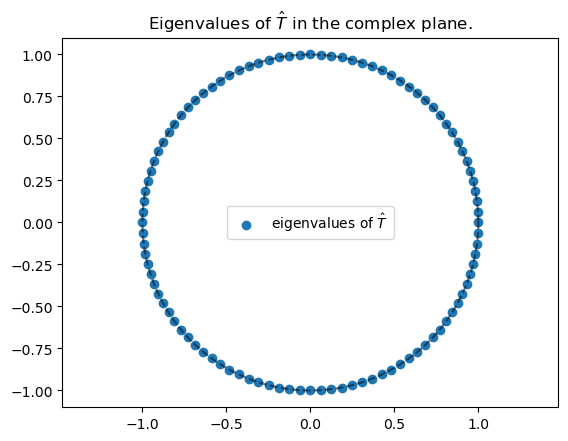

In [4]:
plt.scatter(np.real(translation_eigenvalues), np.imag(translation_eigenvalues), label=r'eigenvalues of $\hat T$')
plt.plot(np.real(np.exp(np.linspace(0, 2*np.pi, 100)*1.j)), np.imag(np.exp(np.linspace(0, 2*np.pi, 100)*1.j)), c='k', ls='--', alpha=0.5)
plt.legend()
plt.title(r"Eigenvalues of $\hat T$ in the complex plane.")
plt.axis('equal')
print()

#### Question 3
The generalized spectral theorem tells us that unitary operators like $\hat T$ can always be diagonalized in an orthonormal basis. Check analytically that if $\ket{\lambda_k}$ and $\ket{\lambda_{k'}}$ are eigenvectors for different eigenvalues of a unitary operator $\hat U$, then they are orthogonal.

>We have:
>
>$$\braket{ \lambda_k | \lambda_{k'}} = \langle \lambda_k | \hat U^\dagger \hat U | \lambda_{k'} \rangle = \lambda_k^* \lambda_{k'} \braket{ \lambda_k | \lambda_{k'}}$$
>
> Since $\hat U$ is unitary, its eigenvalues are on the unit circle and $\lambda_k^* = \lambda_k^{-1}$. Therefore, we obtain:
>
>$$ \left( 1 - \frac{\lambda_{k'}}{\lambda_k} \right) \braket{ \lambda_k | \lambda_{k'}} = 0 $$
>
> such that if $\lambda_{k'} \neq \lambda_k$, we must have $\ket{\lambda_k}$ and $\ket{\lambda_{k'}}$ orthogonal.

#### Question 4
Check numerically that the eigenvectors of $\hat T$ are orthogonal. Are the eigenvectors perfectly orthogonal? Why?

In [5]:
print("Norm of T^\dag T - 1:\t{:.4}".format(np.linalg.norm(np.conj(translation_eigenvectors.T) @ translation_eigenvectors - np.eye(n_sites))))

Norm of T^\dag T - 1:	4.472e-13


> We do not get exactly 0 because of **numerical errors**. Furthermore, even if we had infinite precision, the algorithm for diagonalization is an iterative algorithm that converges to the correct eigendecomposition, but has a small error for a finite number of steps.

#### Question 5
Obtain the Hamiltonian in the eigenbasis of $\hat T$. Compare the eigenvalues you obtained in this way with the eigenvalues obtained by directly diagonalizing $\hat H$. *For Hermitian matrices, you can use `np.linalg.eigh` instead of `np.linalg.eig`.*

In [6]:
hamiltonian_sym_basis = np.linalg.inv(translation_eigenvectors) @ hamiltonian @ translation_eigenvectors
eigenenergies_1 = np.diagonal(hamiltonian_sym_basis)

eigenenergies_2, _ = np.linalg.eigh(hamiltonian)

np.linalg.norm(np.sort(np.real(eigenenergies_1)) - eigenenergies_2)

8.728320470067811e-15

#### Question 6
Plot the eigenenergies of $\hat H$. Do you recover the same plot as in question 6 of the exercise sheet? Why?

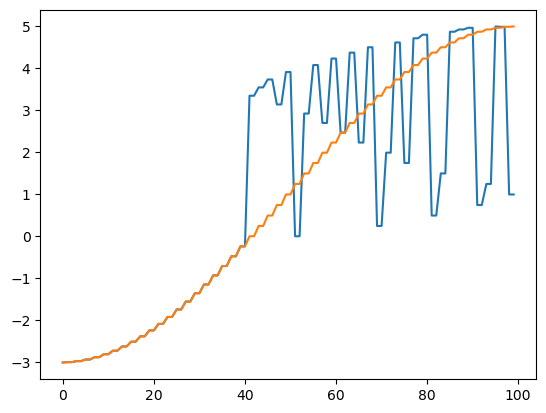

In [7]:
plt.plot(np.real(eigenenergies_1))
plt.plot(eigenenergies_2)

> We can recover the same plot as in question 6 by using the same ordering of the eigenvalues. In question 6, we had ordered the eigenvalues using the phase of the corresponding eigenvalue of $\hat T$.

We can obtain the same plot using the following code:

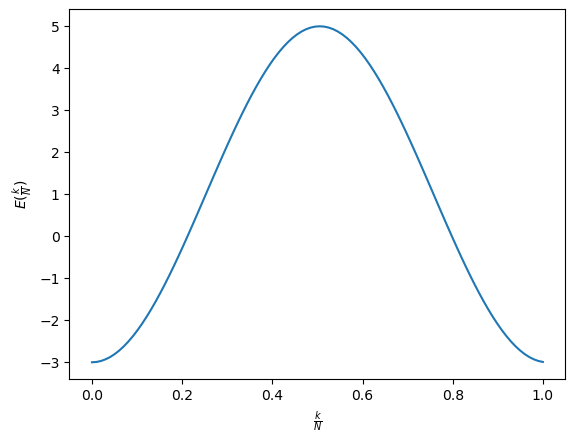

In [8]:
# Get the phase of the eigenvalues of T
standard_phase = np.imag(np.log(translation_eigenvalues))

# Put the phase in the interval [0, 2pi]
positive_phase = np.where(standard_phase<0, standard_phase+2*np.pi, standard_phase)

# Order the eigenvalues of H with the phase of the eigenvalues of T
ordering = np.argsort(positive_phase)
plt.plot(np.linspace(0, 1, n_sites), np.real(eigenenergies_1[ordering]))

plt.xlabel(r"$\frac{k}{N}$")
plt.ylabel(r"$E(\frac{k}{N})$")
print()

#### Question 7
Now consider the same Hamiltonian with open boundary conditions:

$$ \hat H = E_0 - J \sum_{n=0}^{N-2} \left( \ket{n} \bra{n+1} + \ket{n+1} \bra{n} \right) $$

In this Hamiltonian, there is no more hopping term between $\ket 0$ and $\ket{N-1}$. Construct the matrix for this Hamiltonian. Check numerically if it commutes with $\hat T$.

In [9]:
# Define the Hamiltonian
hamiltonian_obc = E_0 * np.eye(n_sites) - J * (np.eye(n_sites, k=-1) + np.eye(n_sites, k=1))

print("\nH:\n", hamiltonian_obc)
print("\nNorm of [H,T]: ", np.linalg.norm(hamiltonian_obc @ translation_operator - translation_operator @ hamiltonian_obc))


H:
 [[ 1. -2.  0. ...  0.  0.  0.]
 [-2.  1. -2. ...  0.  0.  0.]
 [ 0. -2.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -2.  0.]
 [ 0.  0.  0. ... -2.  1. -2.]
 [ 0.  0.  0. ...  0. -2.  1.]]

Norm of [H,T]:  4.0


#### Question 8
Can we apply the same procedure as in the exercise sheet to obtain the eigenenergies? Obtain the eigenenergies numerically and compare them to the eigenenergies in the periodic boundary condition case.

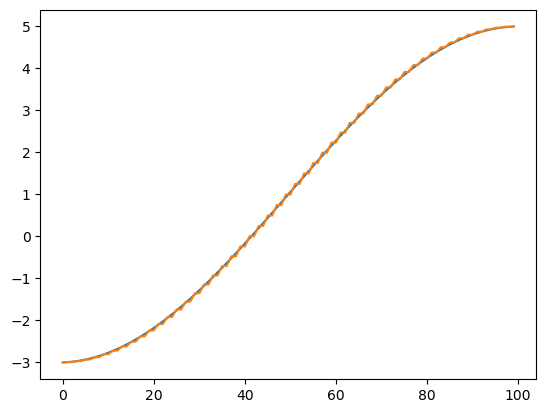

In [10]:
eigenenergies_obc, _ = np.linalg.eigh(hamiltonian_obc)

plt.plot(eigenenergies_obc)
plt.plot(eigenenergies_2)